# Thông tin chung

**Mục tiêu**

- Giới thiệu về bài toán hồi quy và các ứng dụng.
- Giới thiệu thuật toán hồi quy tuyến tính và áp dụng trong phân tích dự báo dữ liệu.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:
- Nắm vững thuật toán hồi quy tuyến tính.
- Cài đặt được các ví dụ thực hành.

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

Hồi quy  _(regression)_ thuộc nhóm các thuật toán học có giám sát được dùng để biểu diễn mối quan hệ giữa một biến phụ thuộc và một hay nhiều biến độc lập. Kết quả phân tích được dùng để dự báo.

Một số thuật toán hồi quy phổ biến:

- Hồi quy tuyến tính
- Hồi quy logistic
- Hồi quy Ridge
- Hồi quy Lasso

**Hồi quy tuyến tính (Linear Regression)**:

Giả sử biến phụ thuộc và các biến độc lập có mối quan hệ tuyến tính và được biểu diễn bởi phương trình đường thẳng:
\begin{equation}
h_{\theta}(x) = \theta_{0} + \theta_{1} x
\end{equation}

Trong đó, 

- $h_{\theta}(x)$: giá trị dự đoán với $\theta$ là tham số của mô hình
- $\theta_{0}$: tung độ gốc hay giá trị của $y$  khi $x = 0$
- $\theta_{1}$: hệ số góc/độ dốc của đường hồi quy


Ví dụ: Mối quan hệ giữa biến phụ thuộc và các biến độc lập trong thực tế.

| Biến độc lập | Biến phụ thuộc |
| :- | :- |
| số giờ trời nắng | số que kem bán được|
| số giờ học | điểm thi |
| diện tích, số phòng, vị trí| giá nhà |

# Nội dung thực hành

## Mô tả bài toán

Cho dữ liệu nhà ở tại Boston gồm các thuộc tính sau:

- CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, , RAD, TAX, PTRATIO, B, LSTAT, MEDV

Hãy dự đoán giá trị trung bình (MEDV) của nhà ở tại Boston.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- Tải dữ liệu giá nhà Boston từ thư viện sklearn

In [2]:
boston_dataset = datasets.load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


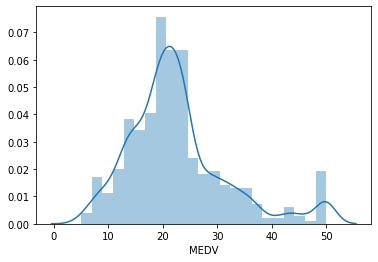

In [7]:
sns.distplot(boston['MEDV'])

In [8]:
corr = boston.corr()

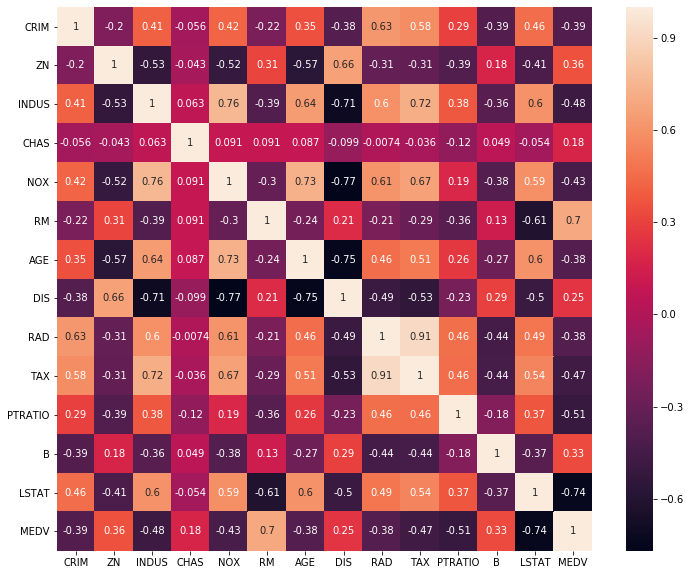

In [9]:
plt.figure(figsize = (12, 10))
ax = sns.heatmap(corr, annot = True)

## Đoạn lệnh sửa lỗi mất dòng đầu, dòng cuối ở phiên bản matplotlib 3.1.1
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##

plt.show()

- Quan sát, ta thấy hai thuộc tính RM và LSTAT có độ tương quan cao với MEDV

<Figure size 432x432 with 0 Axes>

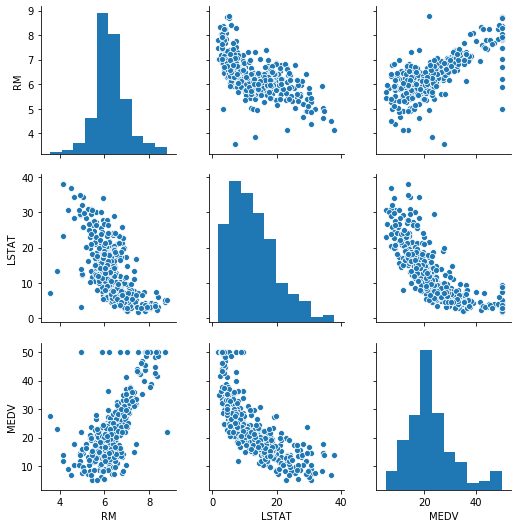

In [10]:
plt.figure(figsize = (6, 6))

sns.pairplot(boston, vars = boston[['RM', 'LSTAT', 'MEDV']])

plt.show()

- Xét mối quan hệ giữa thuộc tính RM và MEDV

In [11]:
X = boston[["RM"]]
y = boston['MEDV']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [13]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('coef =', regr.coef_)
print('intercept =', regr.intercept_)

coef = [8.82345634]
intercept = -32.83912990601127


In [15]:
y_pred = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("Testing")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Testing
RMSE is 4.895963186952217
R2 score is 0.6938399401553497


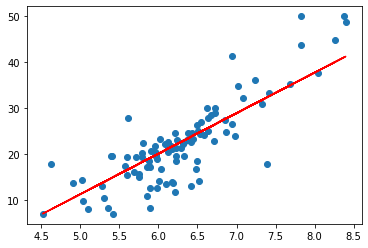

In [16]:
plt.scatter(X_test['RM'], y_test)
plt.plot(X_test['RM'], y_pred, color = 'red')

plt.show()

In [17]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
226,37.6,38.101459
292,27.9,25.660386
90,22.6,23.780989
373,13.8,10.448747
273,35.2,35.022073
...,...,...
349,26.6,28.386834
212,22.4,18.398681
156,13.1,13.678132
480,23.0,22.236885


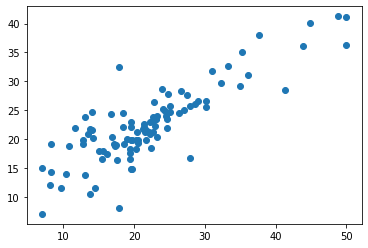

In [18]:
plt.scatter(y_test, y_pred)

- Xét mối quan hệ của hai thuộc tính RM, LSAST với MEDV.

In [19]:
X = boston[['RM', 'LSTAT']]
y = boston['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [21]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('coef =', regr.coef_)
print('intercept =', regr.intercept_)

coef = [ 4.58938833 -0.71722954]
intercept = 2.7362403426065995


In [23]:
y_pred = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("Testing")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Testing
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


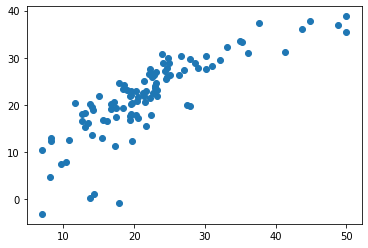

In [24]:
plt.scatter(y_test, y_pred)

# Bài tập

Cho tập dữ liệu giá xe hơi CarPrice_Assignment.csv, hãy xây dựng mô hình dự đoán giá xe.